In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [51]:
## parameters:
L = 4.0
cx = 1.5
cy = 3.0
## IC
sigma = 0.5
amplitude = 5.0
x0 = L/4
t_final = 3



## discretization stuff:
nx = 100
ny = 100
dx = L / (nx - 1)
dy = L/(ny-1)

dt = min(dx/cx, dy/cy)
nt = int(t_final/dt) + 1

nt

223

In [52]:

t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

print(u[:,0])##  time array
print(u[0,:]) ## initial position array

X, Y = np.meshgrid(x, y, indexing='ij')

u = np.zeros((nt, nx, ny)) 

u[0, :, :] = amplitude*np.exp(-((X - L/2)**2 + (Y - L/2)**2) / (2*sigma**2))

# direchlet
u[0,0,:] = 0
u[0,:,0] = 0

u[0,-1,:] = 0
u[0,:,-1] = 0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


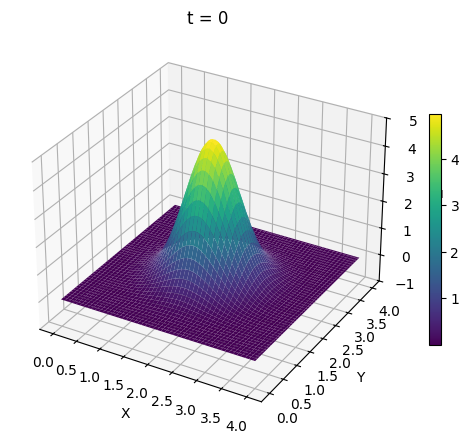

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))

# Initial condition (t=0)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, Y, u[0, :, :], cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u')
ax1.set_title('t = 0')
ax1.set_zlim(-1, 5)  # fix z-axis for comparison
fig.colorbar(surf1, ax=ax1, shrink=0.5)


In [56]:
for j in range(0, nt-1):
    # need arrays for each k stage:
    k1 = np.zeros((nx, ny))
    k2 = np.zeros((nx, ny))
    k3 = np.zeros((nx, ny))
    k4 = np.zeros((nx, ny))

    for i in range(1, nx-1):
        for k in range(1, ny-1):
            k1[i,k] = -cx *(u[j,i,k] - u[j,i-1,k])/dx  - cy*(u[j,i,k] - u[j,i,k-1])/dy

    #k2s:
    u_temp = u[j,:,:] + (dt/2)*k1
    u_temp[0, :] = 0 # Dirichlet
    u_temp[:, 0] = 0
    u_temp[-1, :] = 0
    u_temp[:,-1] = 0
    for i in range(1, nx-1):
        for k in range(1, ny-1):
            k2[i,k] = -cx *(u_temp[i,k]- u_temp[i-1,k])/dx  - cy*(u_temp[i,k] - u_temp[i,k-1])/dy
    
    #k3s:
    u_temp = u[j,:,:] + (dt/2)*k2
    u_temp[0, :] = 0 # Dirichlet
    u_temp[:, 0] = 0
    u_temp[-1, :] = 0
    u_temp[:,-1] = 0
    for i in range(1, nx-1):
        for k in range(1, ny-1):
            k3[i,k] = -cx *(u_temp[i,k]- u_temp[i-1,k])/dx  - cy*(u_temp[i,k] - u_temp[i,k-1])/dy

    #k4s:
    u_temp = u[j,:,:] + dt*k3
    u_temp[0, :] = 0 # Dirichlet
    u_temp[:, 0] = 0
    u_temp[-1, :] = 0
    u_temp[:,-1] = 0
    for i in range(1, nx-1):
        for k in range(1, ny-1):
            k4[i,k] = -cx *(u_temp[i,k]- u_temp[i-1,k])/dx  - cy*(u_temp[i,k] - u_temp[i,k-1])/dy


    u[j+1, :, :] = u[j, :, :] + (dt/6)*(k1+k2+k3+k4)
    u[j+1,:,0] = 0
    u[j+1,0,:] = 0
    u[j+1,:,-1] = 0
    u[j+1,-1,:] = 0

    


In [57]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(6, 5))

# Initial frame
im = ax.imshow(u[0, :, :].T, extent=[0, L, 0, L], origin='lower', 
               cmap='RdBu_r', vmin=-1, vmax=1, animated=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D advection Equation - t = 0.00s')
fig.colorbar(im, ax=ax, label='Displacement u')

def animate(frame):
    im.set_array(u[frame, :, :].T)
    ax.set_title(f'2D advection - t = {t[frame]:.2f}s')
    return [im]

# Only 30 frames, slow fps
skip = max(1, nt // 30)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=200, blit=True)

anim.save('advection_dirichelt_2d.gif', writer=PillowWriter(fps=5), dpi=60)
print("Saved wave_2d.gif!")

plt.close()

Saved wave_2d.gif!


In [20]:
nx, nt

(100, 119)

In [21]:
u.shape

(119, 100, 100)